In [1]:
import numpy as np 
import pandas as pd
# for local
TRAIN_DIR = "../data/input/train.csv"
TEST_DIR = "../data/input/test.csv"
SUBMIT_DIR = "../data/output/sample_submission.csv"

# for kaggle notebook
# TRAIN_DIR = "/kaggle/input/icr-identify-age-related-conditions/train.csv"
# TEST_DIR = "/kaggle/input/icr-identify-age-related-conditions/test.csv"
# SUBMIT_DIR = "/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv"

In [2]:
train = pd.read_csv(TRAIN_DIR)
test = pd.read_csv(TEST_DIR)

train["EJ"] = train["EJ"].map({"A":0,"B":1})
test["EJ"] = test["EJ"].map({"A":0,"B":1})

In [3]:
from sklearn.impute import SimpleImputer,KNNImputer
imputer = KNNImputer(n_neighbors=50)

X = train.drop(["Id","Class"],axis=1)
X = imputer.fit_transform(X)
y = train[["Class"]].to_numpy()

X_test = test.drop("Id",axis=1)
X_test = imputer.fit_transform(X_test)

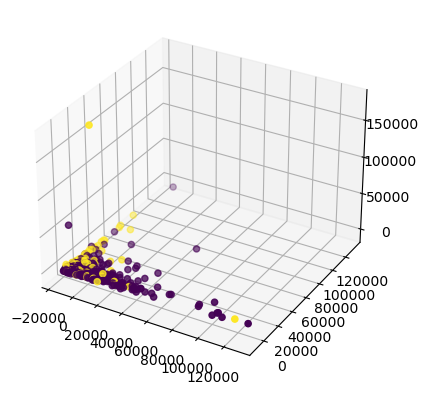

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
trans_X = pca.fit_transform(X)

from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(trans_X[:,0],trans_X[:,1],trans_X[:,2],c=y.reshape(-1))
# plt.xlim(0,100)
# plt.ylim(0,100)
plt.show()

In [21]:
pca.fit_transform(X).shape

(617, 2)

In [20]:
y.reshape(-1).shape

(617,)